## Optimal Inventory Decision

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
train_data = pd.read_csv('../data/Data-train.csv',index_col=0)
X_train=train_data.drop('sales',axis=1)
y_train_log=np.log(train_data.sales)
gbc = GradientBoostingRegressor(learning_rate=0.3, n_estimators=200,max_depth=3,random_state=24)
gbc.fit(X_train,y_train_log)
y_score = gbc.predict(X_train)
resid=train_data.sales-np.exp(y_score)

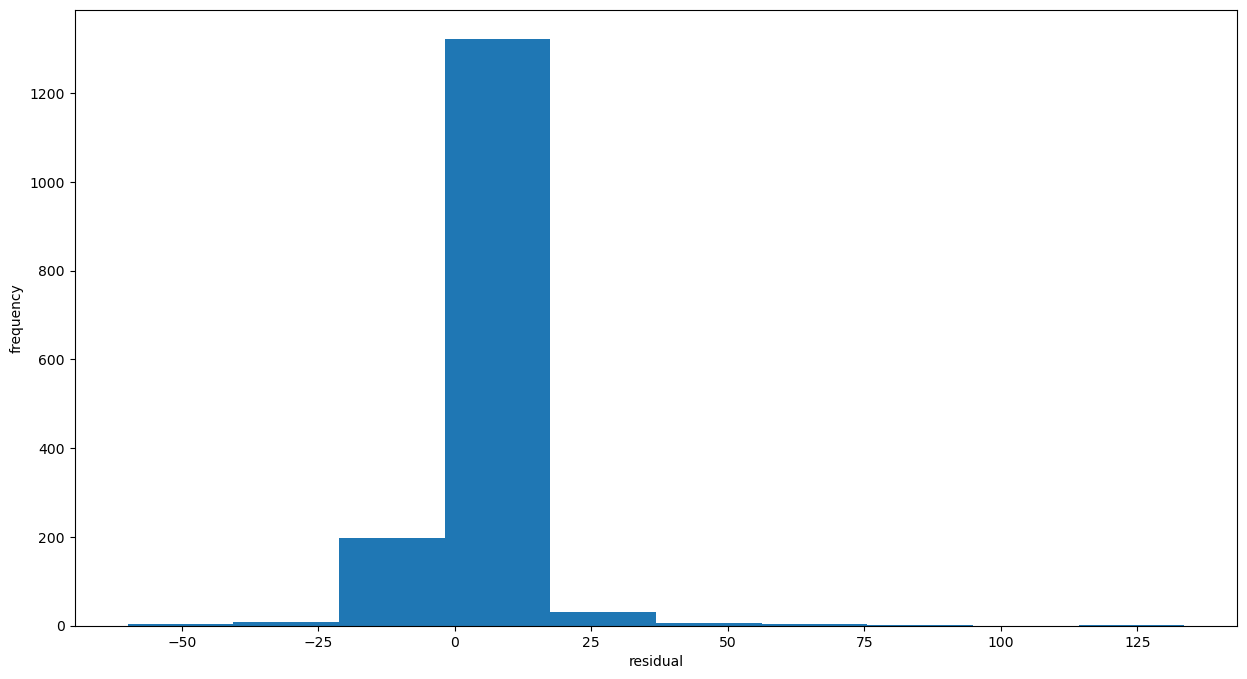

In [ ]:
import matplotlib.pyplot as plt
plt.hist(resid.values)
plt.xlabel('residual')
plt.ylabel('frequency')
plt.savefig('../figures/distribution.png')

In [ ]:
resid=train_data.sales-np.exp(y_score)
sum(resid**2)

133116.02224148135

Examine the distribution of the residuals:

In [ ]:
import scipy.stats as stats

In [ ]:
result = stats.anderson (resid.values, dist ='expon' )
print("Anderson-Darling statistics:", result.statistic)
print("Critical values:", result.critical_values)
if result.statistic > result.critical_values[2]:
    print("The residuals do not follow exponential distribution")
else:
    print("The residuals may follow exponential distribution")


Anderson-Darling statistics: inf
Critical values: [0.922 1.078 1.34  1.605 1.956]
The residuals do not follow exponential distribution


In [ ]:
result = stats.anderson (resid.values, dist ='logistic' )
print("Anderson-Darling statistics:", result.statistic)
print("Critical values:", result.critical_values)
if result.statistic > result.critical_values[2]:
    print("The residuals do not follow logistic distribution")
else:
    print("The residuals may follow logistic distribution")

Anderson-Darling statistics: 129.49422114389563
Critical values: [0.426 0.563 0.66  0.769 0.906 1.01 ]
The residuals do not follow logistic distribution


D:\Py-space\Miniconda3\envs\r_learning\lib\site-packages\scipy\stats\_morestats.py:1965: RuntimeWarning: overflow encountered in exp
  tmp2 = exp(tmp)
D:\Py-space\Miniconda3\envs\r_learning\lib\site-packages\scipy\stats\_morestats.py:1967: RuntimeWarning: invalid value encountered in divide
  np.sum(tmp*(1.0-tmp2)/(1+tmp2), axis=0) + N]


In [ ]:
result = stats.anderson (resid.values, dist ='norm' )
print("Anderson-Darling Statistics:", result.statistic)
print("Critical values:", result.critical_values)
if result.statistic > result.critical_values[2]:
    print("The residuals do not follow normal distribution")
else:
    print("The residuals may follow logistic distribution")

Anderson-Darling Statistics: 246.29605799967317
Critical values: [0.575 0.654 0.785 0.916 1.089]
The residuals do not follow normal distribution


Therefore, apply the discrete distribution.

In [ ]:
re = resid.values
re.sort()
re

array([-59.93676637, -51.41869678, -48.06840873, ...,  83.78179246,
       123.01918226, 133.63958581])

In [ ]:
p=20
c=12
s=8
ratio=(p-c)/(p-s)

In [ ]:
position=ratio*len(resid)
position

1050.6666666666665

In [ ]:
re[round(position)]

0.41098238397803577

Output:

In [ ]:
import math
test_data = pd.read_csv('../data/Data-test.csv',index_col=0)
X_test=test_data
y_test_log=gbc.predict(X_test)
y_test = np.round(np.exp(y_test_log))
y_test

array([ 5.,  6.,  1., ..., 20.,  5., 18.])

In [ ]:
# inventory = np.exp(RF.predict(X_test)+ re[math.ceil(position)])
inventory=np.exp(y_test_log)+re[math.ceil(position)]
Inventory = np.round(inventory)
Inventory

array([ 6.,  6.,  2., ..., 20.,  5., 18.])

In [ ]:
test_data['sales']=y_test
test_data['inventory'] = Inventory

test_data.to_csv("group5.csv", index=True)